<a href="https://colab.research.google.com/github/beriaacan/Machine-Learning-Algorithms/blob/main/knn_and_sgd_applications/hw1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. K-Nearest Neighbors (KNN) Classifier

* (a)  Import the packages that you are going to use and print their versions before starting your analysis.Remember to use comments to clarify your code as you go through your analysis. Please refer to the Style Guide for Python Code for details on how to utilize comments correctly and other styling issues.




#A) Version Control

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.metrics import confusion_matrix, classification_report

# versions
import sys
import platform

import matplotlib, sklearn

print("Python Version:")
print(sys.version)

print("\nSystem Information:")
print(platform.platform())

print(f"\nNumPy Version: {np.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print(f"Sklearn Version: {sklearn.__version__}")

Python Version:
3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]

System Information:
Linux-5.15.120+-x86_64-with-glibc2.35

NumPy Version: 1.23.5
Pandas Version: 1.5.3
Matplotlib Version: 3.7.1
Sklearn Version: 1.2.2


#B) From Strach KNN



*  (b) Import your own KNN classifier that you implemented in the course to work on data released by the High Time Resolution Universe Survey. The README txt file contains all the relevant information. The label column of this data set is named “ispulsar”. Note that the KNN classifier should have fit and predict functions, as we discussed during the lecture.




##KNN

In [ ]:
class KNeighborsClassifier:
    # initiate
    def __init__(self, k, distance_metric, p=2):
        self.k = k
        self.distance_metric = distance_metric
        self.p=p

    # fit function
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    #distance functions
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2, axis=1, dtype=float))

    def manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2), axis=1, dtype=float)

    def minkowski_distance(self, x1, x2, p):
        return np.power(np.sum(np.power(np.abs(x1 - x2), self.p), axis=1, dtype=float), 1/self.p)

    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return self.euclidean_distance(x1, x2)
        elif self.distance_metric == 'manhattan':
            return self.manhattan_distance(x1, x2)
        elif self.distance_metric == 'minkowski':
            return self.minkowski_distance(x1, x2, self.p)
        else:
            raise ValueError("Invalid distance metric. Supported metrics are 'euclidean', 'manhattan', and 'minkowski'.")

    # predict function
    def predict(self, x):
        labels = np.zeros(x.shape[0])
        for i, value in enumerate(x):
            distances = self.calculate_distance(value, self.X_train)
            k_inds = np.argsort(distances)[:self.k]
            classes_k = self.y_train[k_inds]
            neighbors = np.bincount(classes_k).argmax()
            labels[i] = neighbors
        return labels

In [ ]:
# Load the HTRU2 data from the CSV file
data = pd.read_csv('drive/MyDrive/FIZ437E(2023-2024 fall)/HTRU2.csv')

In [ ]:
# Extract features (X) and labels (y)
X = data.drop('ispulsar', axis=1).values #burada label disinda tum verileri aldim
y = data['ispulsar'].values #label atadim

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X

array([[140.5625    ,  55.68378214,  -0.23457141, ...,  19.11042633,
          7.97553179,  74.24222492],
       [102.5078125 ,  58.88243001,   0.46531815, ...,  14.86014572,
         10.57648674, 127.3935796 ],
       [103.015625  ,  39.34164944,   0.32332837, ...,  21.74466875,
          7.73582202,  63.17190911],
       ...,
       [119.3359375 ,  59.93593941,   0.1593631 , ...,  58.8720002 ,
          2.49951714,   4.59517265],
       [114.5078125 ,  53.90239966,   0.20116138, ...,  13.38173065,
         10.00796731, 134.2389095 ],
       [ 57.0625    ,  85.79734025,   1.40639105, ...,  64.71256228,
         -1.59752658,   1.42947536]])

In [ ]:
data.head()

pmean       pstd     pskew     pkurt     dmean       dstd      dskew  \
0  140.562500  55.683782 -0.234571 -0.699648  3.199833  19.110426   7.975532   
1  102.507812  58.882430  0.465318 -0.515088  1.677258  14.860146  10.576487   
2  103.015625  39.341649  0.323328  1.051164  3.121237  21.744669   7.735822   
3  136.750000  57.178449 -0.068415 -0.636238  3.642977  20.959280   6.896499   
4   88.726562  40.672225  0.600866  1.123492  1.178930  11.468720  14.269573   

         dkur  ispulsar  
0   74.242225         0  
1  127.393580         0  
2   63.171909         0  
3   53.593661         0  
4  252.567306         0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pmean     17898 non-null  float64
 1   pstd      17898 non-null  float64
 2   pskew     17898 non-null  float64
 3   pkurt     17898 non-null  float64
 4   dmean     17898 non-null  float64
 5   dstd      17898 non-null  float64
 6   dskew     17898 non-null  float64
 7   dkur      17898 non-null  float64
 8   ispulsar  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
data.columns

Index(['pmean', 'pstd', 'pskew', 'pkurt', 'dmean', 'dstd', 'dskew', 'dkur',
       'ispulsar'],
      dtype='object')

#C) Exploratory Data Analysis



* (c)  Inspect the distribution of the features across the data. Plot each feature against each other. In these plots, please present points that belong to class 0 with the color blue and class 1 with the color orange. You can use Matplotlib, Pandas, Seaborn packages, or any other package of your preference



##Pairplot kullanim amacı :
Bir veri setinde çok sayıda sayısal özellik olduğunda, pairplot fonksiyonu her bir özelliğin diğer özelliklerle olan ilişkisini gösteren bir matris oluşturur.

Özellikle sınıflandırma problemlerinde hangi özelliklerin sınıfları ayırt etmede daha etkili olduğunu görmek için kullanılabilir.

yani en iyi sekilde ayırt edilmis feature kullanabilirim olabildiğince non-homojen dagilmis olmasi lazim

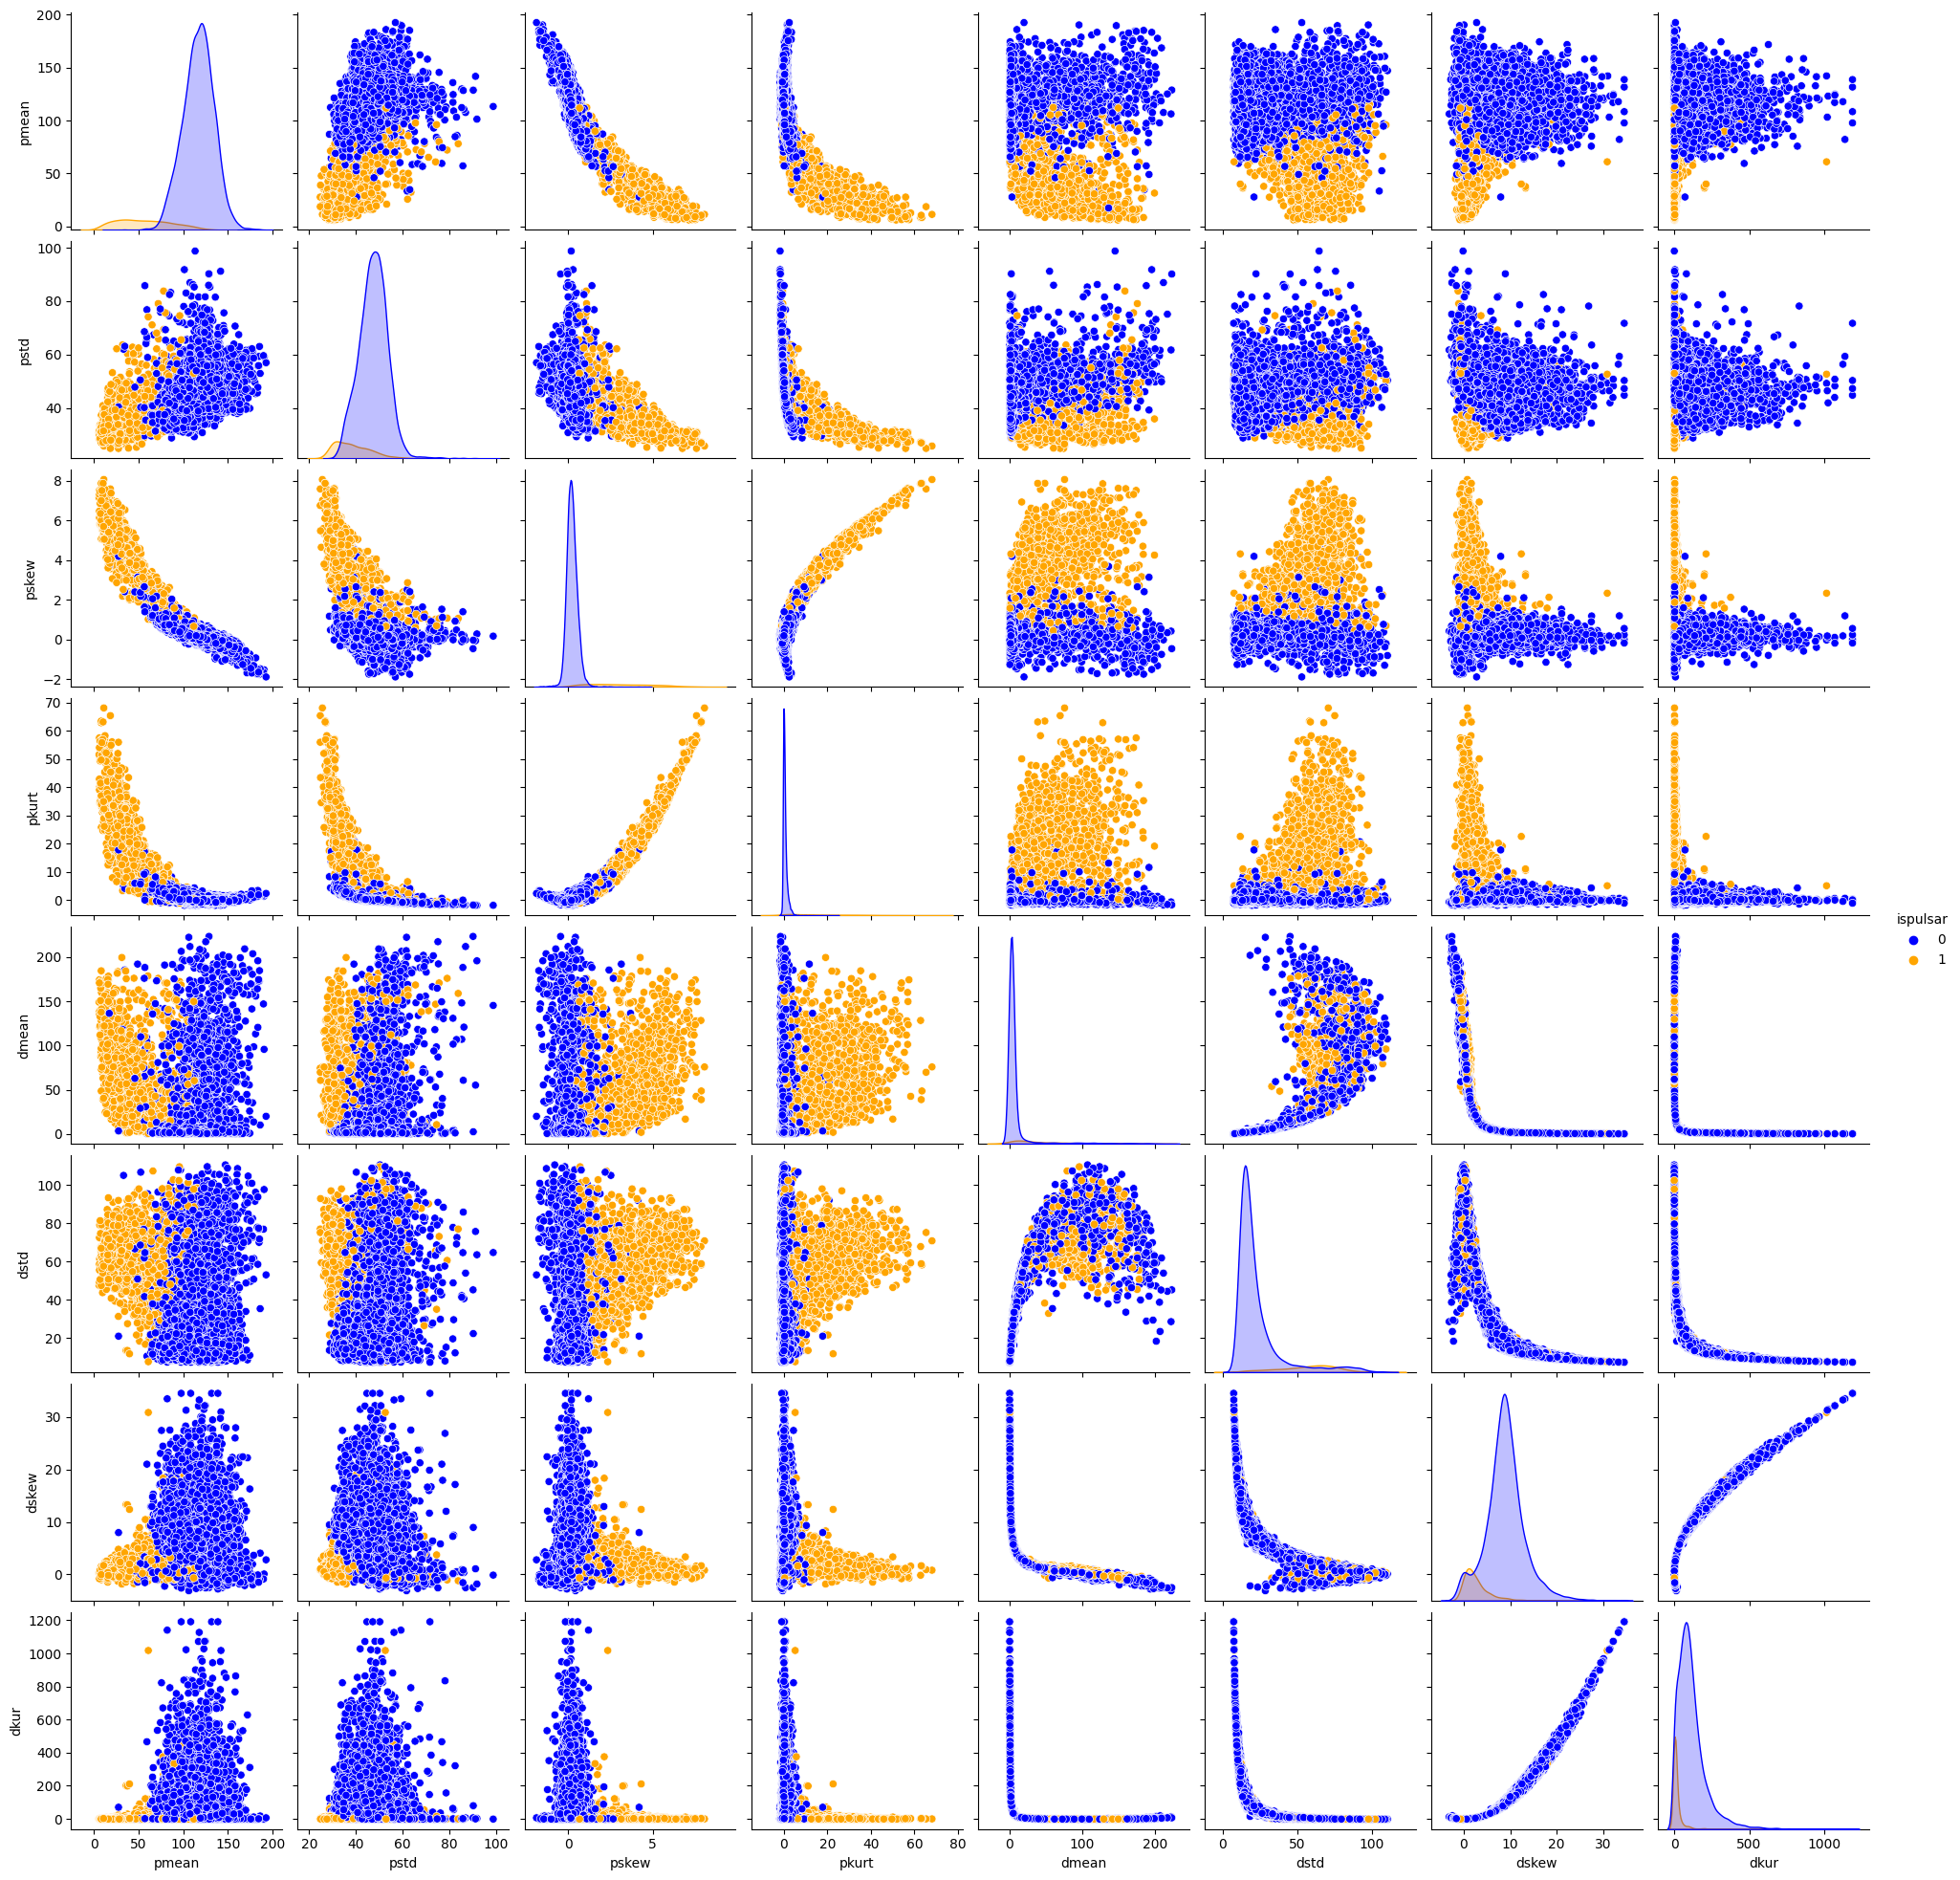

In [ ]:
# Display pairplot for the entire dataset
sns.pairplot(data, hue='ispulsar', palette={0: 'blue', 1: 'orange'})
plt.show()


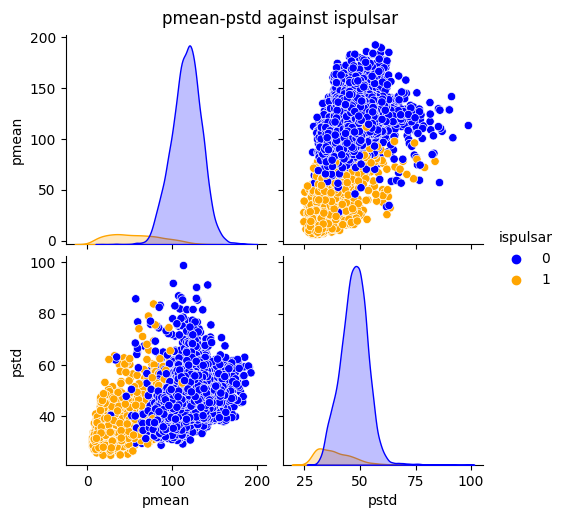

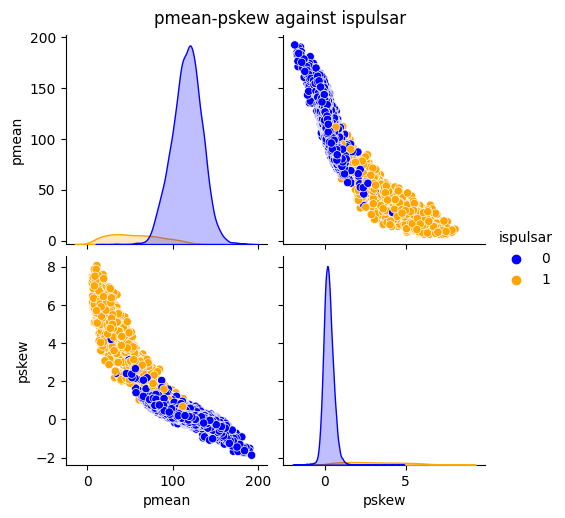

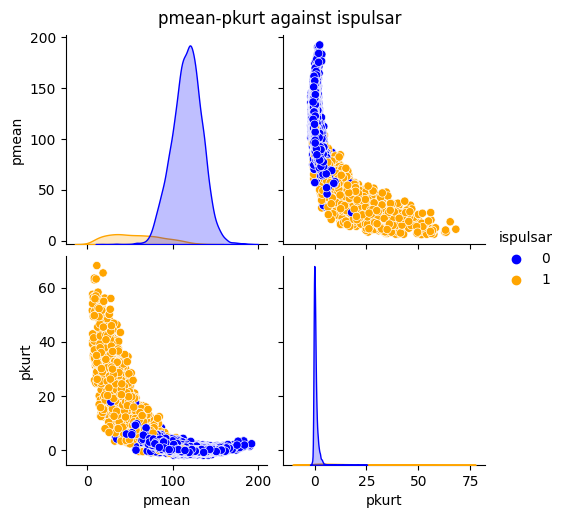

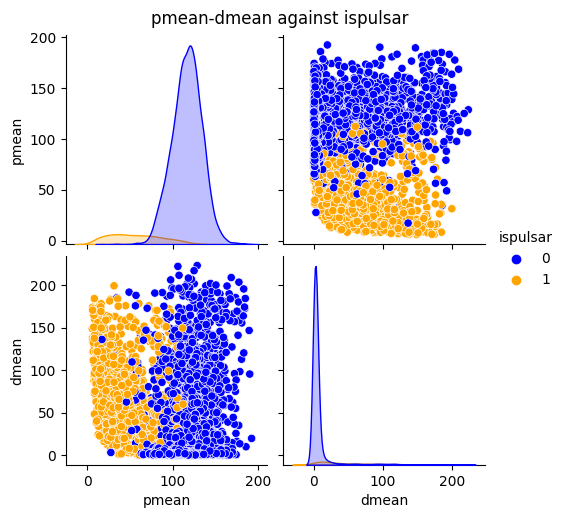

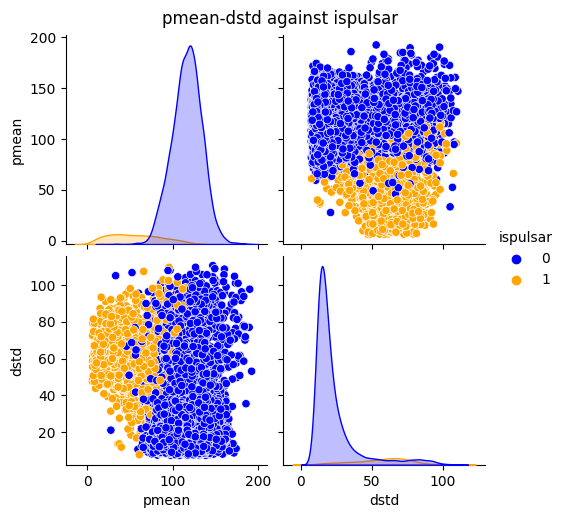

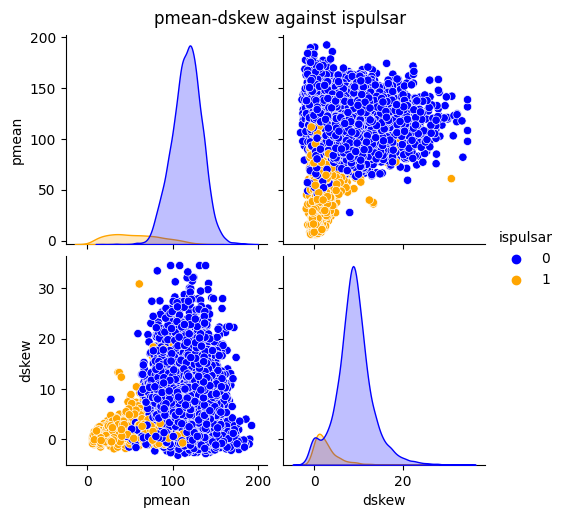

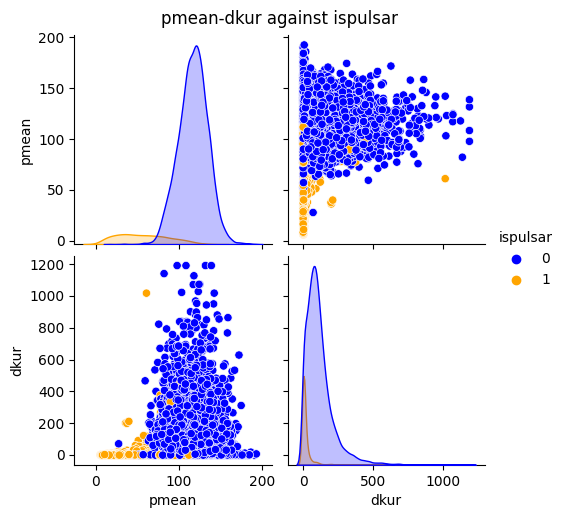

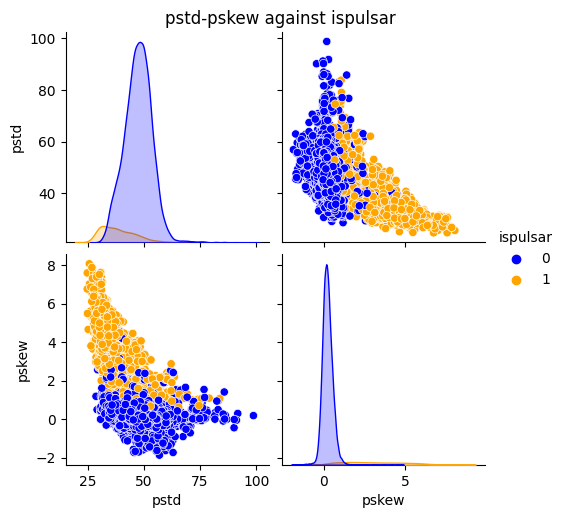

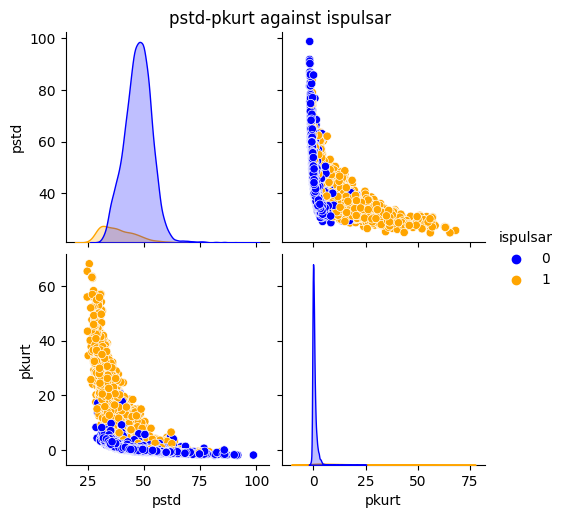

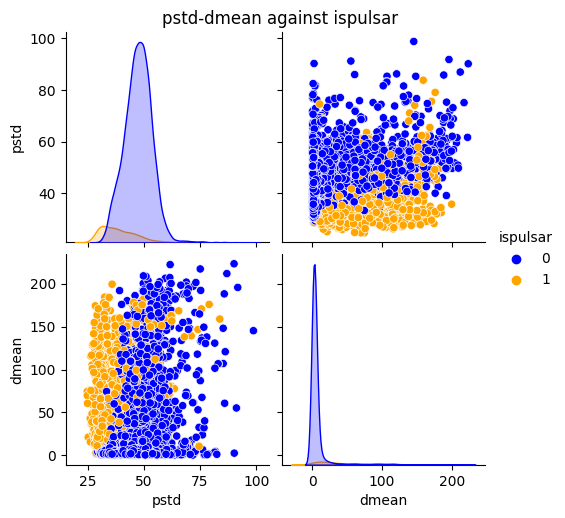

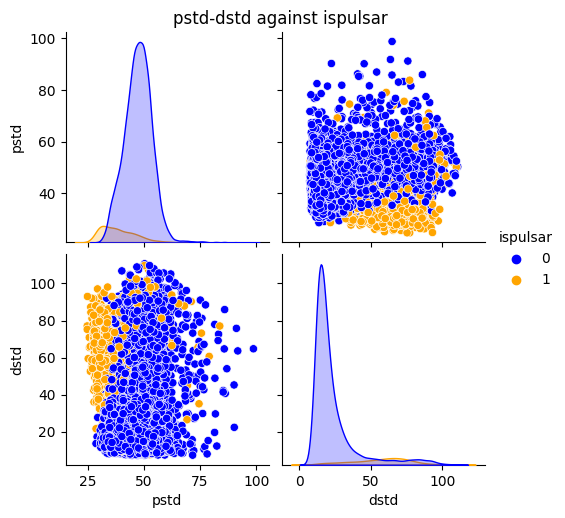

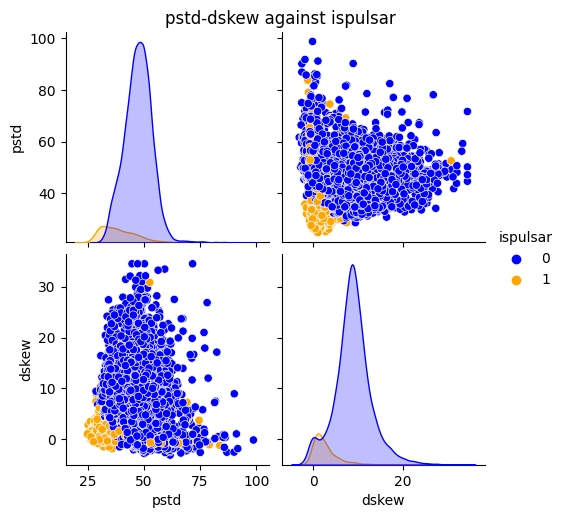

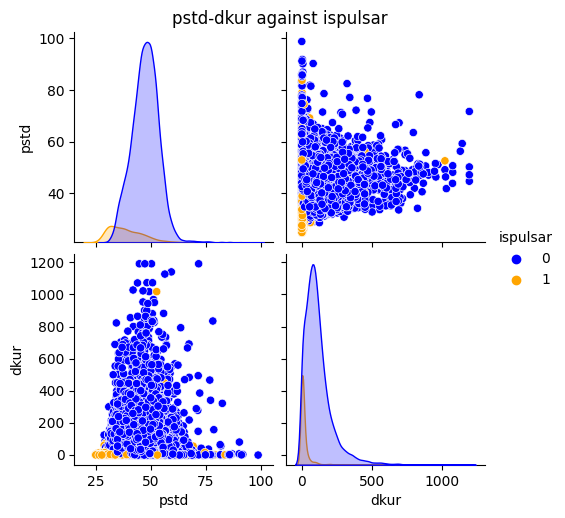

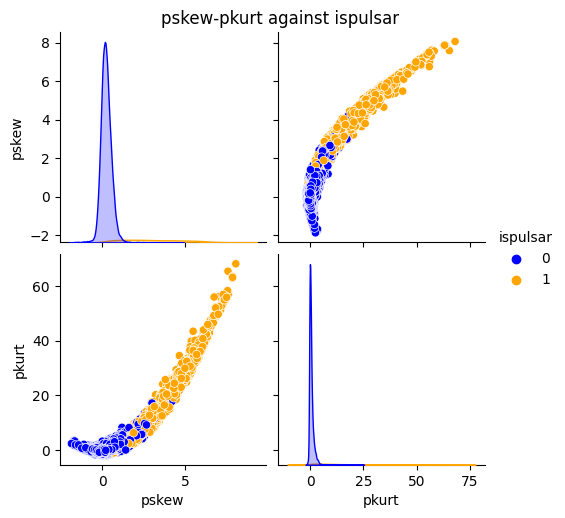

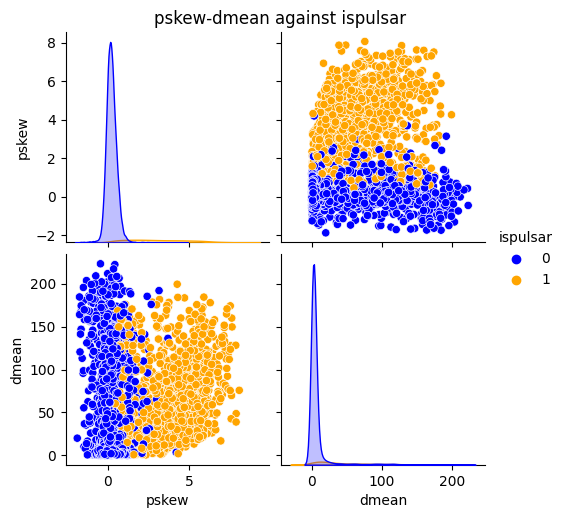

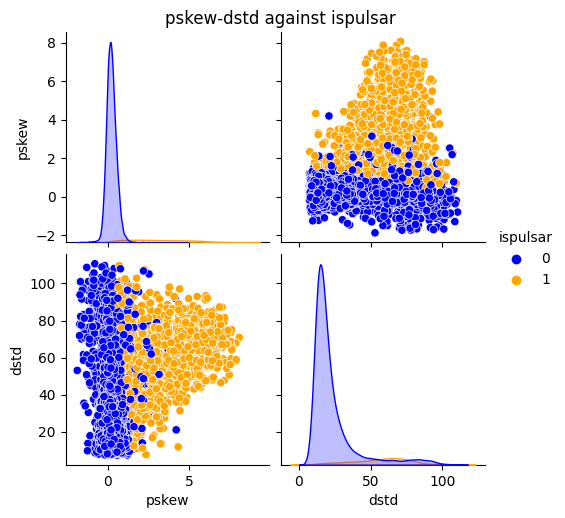

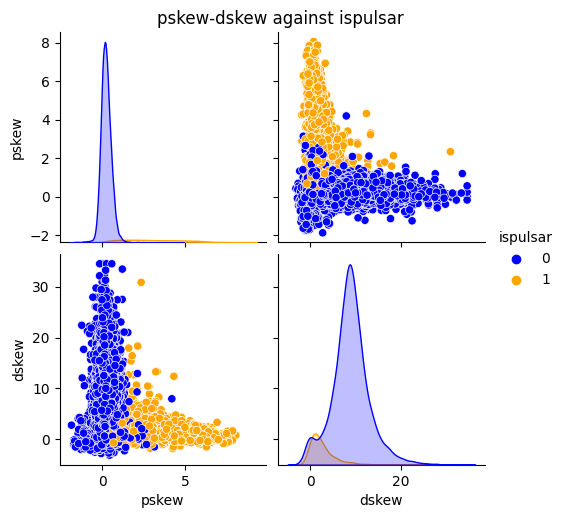

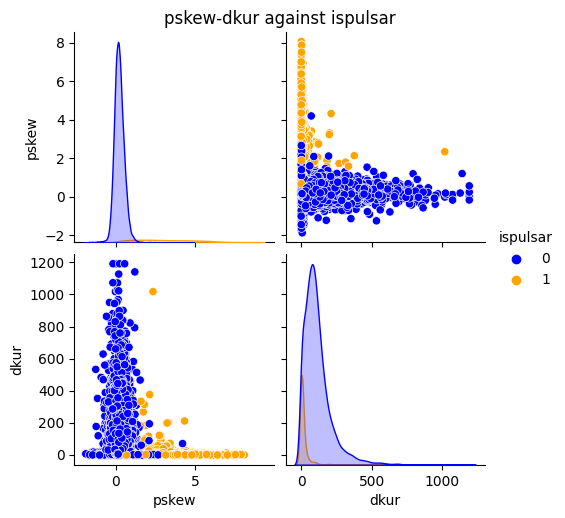

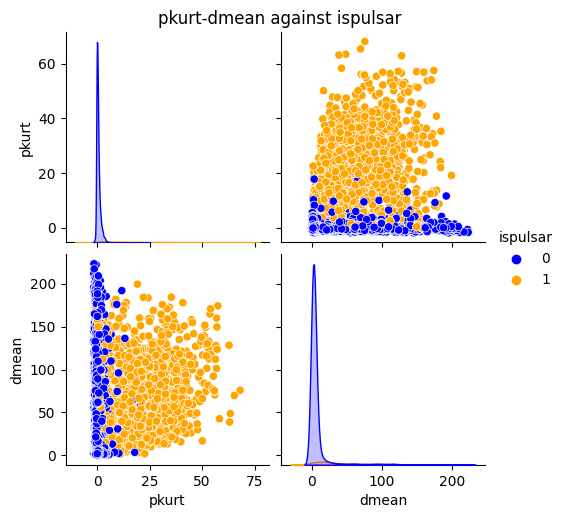

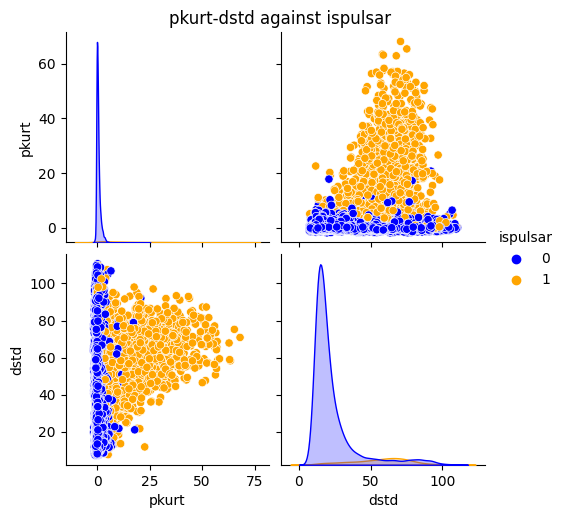

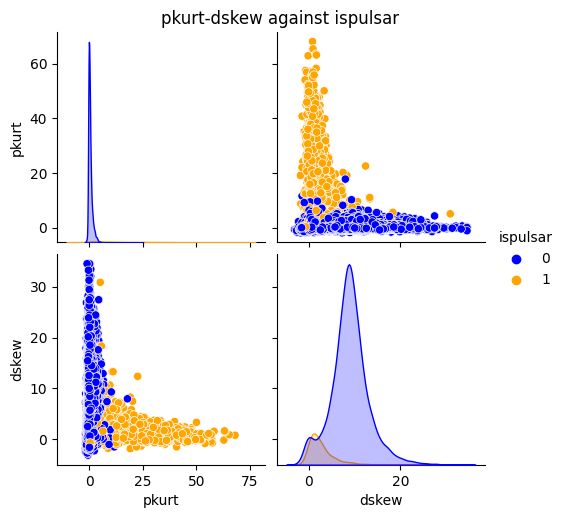

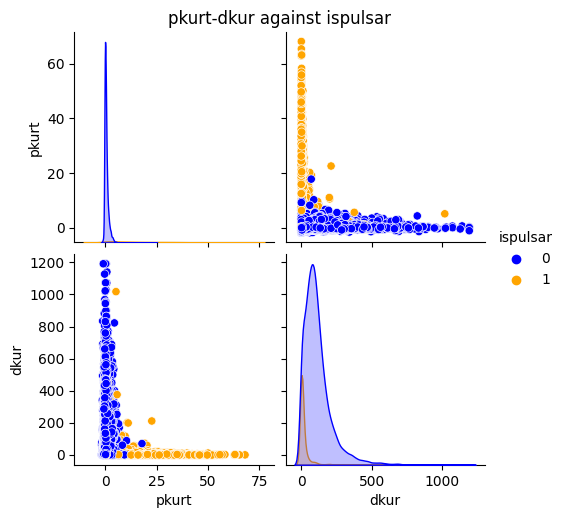

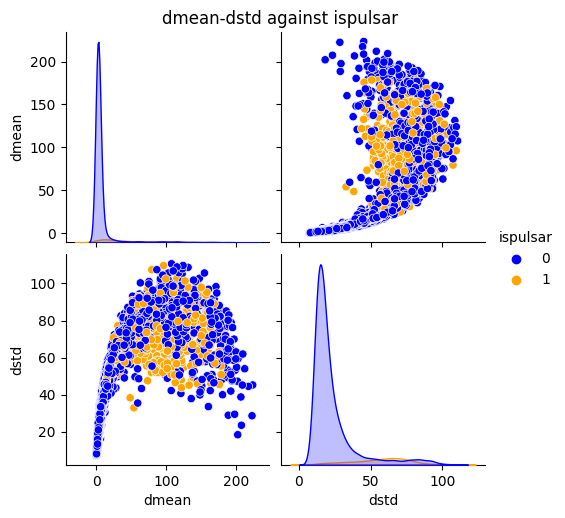

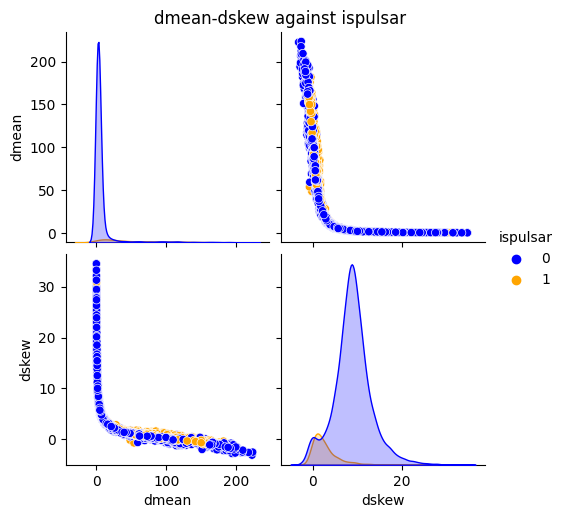

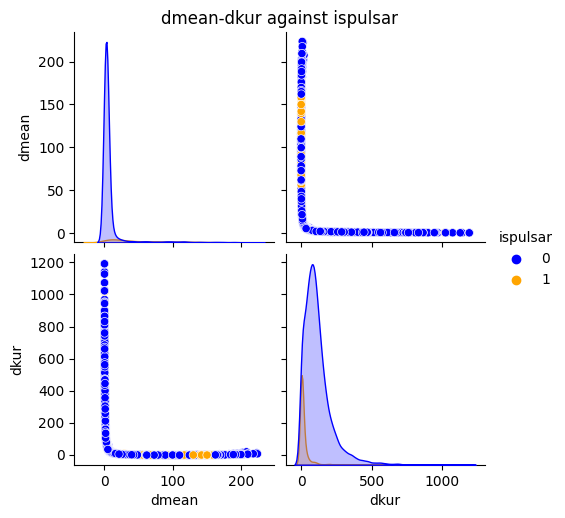

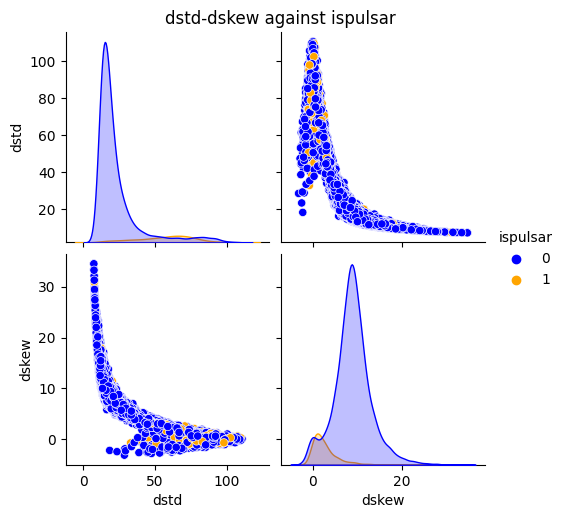

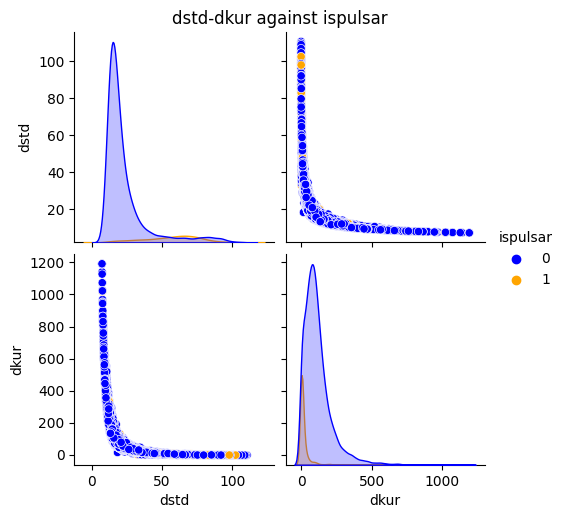

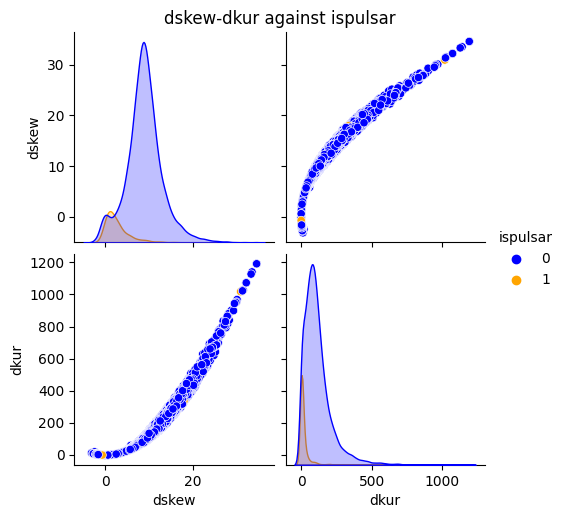

In [ ]:
for var in combinations(data.columns[:-1],2):
    var_list = list(var)
    var_list.append('ispulsar')
    pair_plot = sns.pairplot(data[var_list], hue='ispulsar', palette={0: 'blue', 1: 'orange'})
    pair_plot.fig.suptitle(f"{'-'.join(var_list[:-1])} against {var_list[-1]}", y=1.02)
    plt.show()

# D) Split Dataset



*   (d) Split the data into train and test samples. This data set contains 17898 samples. I suggest you use a sub-sample of the data. Suggestion: training data with shape (5000, 8) and test data with shape (500, 8).




burada seed kullanma sebebim sürekli aynı random dongu olussun hata olursa gorebileyim diye

Seed kullanmazsam, rastgele sayı üreteci her çalıştığında farklı olur . aynı rastgele sayıları elde etmek mümkün olmaz. farklı durumları karsılastırırken zorlanırım yani kısaca elimdeki datayi karistirmak istiyorum ki overfit olmasın hani ama karistirirken hep ayni degerle karistiriyorum(yani karistirdigim sayi ayni ) boylece hata olursa bulabiliyorum rahatca

In [ ]:
# Extract features (X) and labels (y)
X = data.drop('ispulsar', axis=1).values
y = data['ispulsar'].values

# Set seed for reproducibility
np.random.seed(42)

# Shuffle the indices
indices = np.random.permutation(len(data))

# Define the number of samples for training and testing
num_train_samples = 5000
num_test_samples = 500

# Split the indices into training and testing sets
train_indices = indices[:num_train_samples]
test_indices = indices[num_train_samples:(num_train_samples + num_test_samples)]

#veri setini rastgele bolmek ve her seferinde farkli bir bolme elde etmek icin

# Extract training and testing data
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

# E AND F) HYPERPARAMETER TUNING



*   (e) Create various KNN models with different hyperparameter choices, i.e., number of nearest neighbors and different distance metrics, such as Euclidean or Manhattan. Fit train data and predict the labels of test samples using these models.


*   (f) Calculate the number of correct predictions, wrong predictions, and fraction of correctly predicted samples (also known as the accuracy score) for each model. Discuss the suitability of the accuracy score for this data set



In [ ]:
# Create a list of hyperparameter choices
k_values = np.arange(1,11,1, dtype=int)
distance_metrics = ['euclidean', 'manhattan']

In [ ]:
%time
# Iterate over hyperparameter choices
for k in k_values:
    for distance_metric in distance_metrics:
        # Create an instance of the KNeighborsClassifier
        knn_classifier = KNeighborsClassifier(k=k, distance_metric=distance_metric)

        # Fit the classifier on the training data
        knn_classifier.fit(X_train, y_train)

        # Predict on the test data
        y_pred = knn_classifier.predict(X_test)

        # Evaluate the accuracy
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        print(f"Model with k={k}, distance_metric={distance_metric}: Accuracy = {accuracy * 100:.2f}%")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs
Model with k=1, distance_metric=euclidean: Accuracy = 95.80%
Model with k=1, distance_metric=manhattan: Accuracy = 96.00%
Model with k=2, distance_metric=euclidean: Accuracy = 97.00%
Model with k=2, distance_metric=manhattan: Accuracy = 96.80%
Model with k=3, distance_metric=euclidean: Accuracy = 96.80%
Model with k=3, distance_metric=manhattan: Accuracy = 96.80%
Model with k=4, distance_metric=euclidean: Accuracy = 97.00%
Model with k=4, distance_metric=manhattan: Accuracy = 97.00%
Model with k=5, distance_metric=euclidean: Accuracy = 97.20%
Model with k=5, distance_metric=manhattan: Accuracy = 97.00%
Model with k=6, distance_metric=euclidean: Accuracy = 97.00%
Model with k=6, distance_metric=manhattan: Accuracy = 97.00%
Model with k=7, distance_metric=euclidean: Accuracy = 97.20%
Model with k=7, distance_metric=manhattan: Accuracy = 97.00%
Model with k=8, distance_metric=euclidean: Accuracy = 96.80%
Model with k=8, dista

The accuracy score provides a general measure of the model's performance, indicating the percentage of correctly predicted samples out of the total samples. In the provided results, the accuracy scores are quite high, ranging from 96.80% to 97.20%.

However, the suitability of the accuracy score depends on the characteristics of the dataset. In some cases, accuracy may not be the most informative metric, especially if the dataset is imbalanced. For example, if there are many more non-pulsar examples than pulsar examples (or vice versa), a high accuracy score can be achieved by simply predicting the majority class.

To obtain a more comprehensive understanding of the model's performance, it's advisable to consider additional metrics such as precision, recall, F1 score, and confusion matrix, especially when dealing with imbalanced datasets. These metrics provide insights into the model's ability to correctly classify positive and negative instances.

In summary, while accuracy is a useful metric, it's important to assess the overall performance using a combination of different evaluation metrics, especially in situations where class imbalances may affect the interpretation of results.

*   (g) Display the confusion matrix. Investigate precision, recall, and f1-score evaluation metrics and report their results. https://scikit-learn.org/stable/modules/model_evaluation.html#


In [ ]:
# Choose the hyperparameters for the final model
final_k = 5
final_distance_metric = 'euclidean'

# Create an instance of the KNeighborsClassifier with the chosen hyperparameters
final_knn_classifier = KNeighborsClassifier(k=final_k, distance_metric=final_distance_metric)

# Fit the final classifier on the entire training data
final_knn_classifier.fit(X_train, y_train)

# Predict on the test data
final_y_pred = final_knn_classifier.predict(X_test)

<Figure size 1000x600 with 0 Axes>

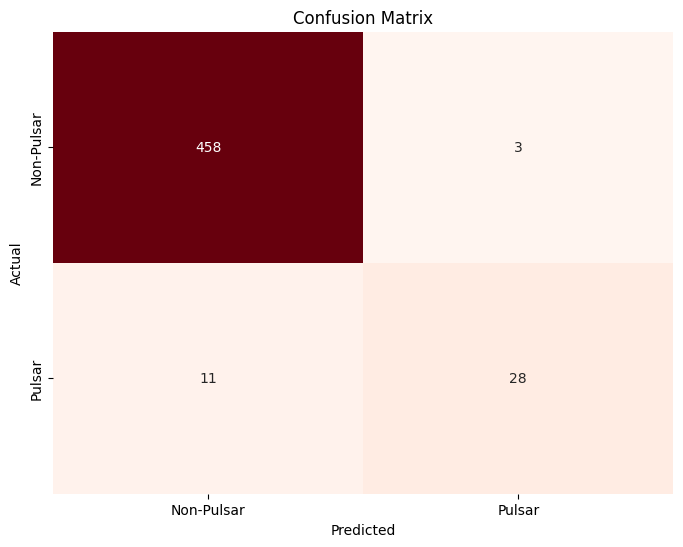

In [ ]:
# Display the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, final_y_pred)

fig = plt.figure(figsize=(10,6))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Non-Pulsar', 'Pulsar'],
            yticklabels=['Non-Pulsar', 'Pulsar'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Figure size 1000x600 with 0 Axes>

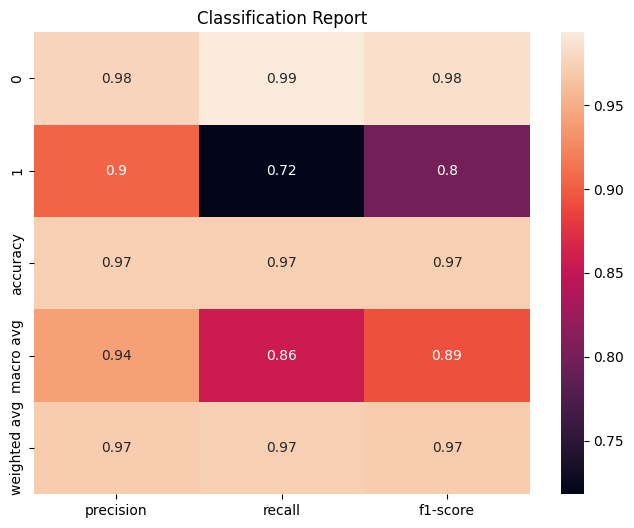

In [ ]:
# Display classification report
fig = plt.figure(figsize=(10,6))
class_report =  classification_report(y_test, final_y_pred, output_dict = True)

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True)
plt.title('Classification Report')
plt.show()

## H) CROSS-VALIDATION

*   (h) Perform a cross-validation procedure for values of k = 1, 2, 3, 5, 10, 15, 20. Split the training data into five folds. For each value of k, use 4 folds as the training data and the remaining 1 fold as the test data. You should permute the folds also, i.e., each fold should be used as the test data once. Calculate and report the accuracy for each k and for all folds. Calculate the mean and standard deviation of the accuracies for each k and for all folds Plot the k values vs accuracy graph. Overplot mean accuracies and their standard deviations. Which k value do you prefer, according to this analysis?

genelleme yeteneğini ölçmek amacıyla cv yapiyoruz yani tek veri setinde overfit durumuna dair yorumu engeller ya da underfit durumunu genel olarak en dogru hiperparametreyi bulmamiza vs yardimci olur

In [ ]:
%time
# Define the values of k for cross-validation
k_values_cv = [1, 2, 3, 5, 10, 15, 20]

# Number of folds for cross-validation
num_folds = 5

# Initialize lists to store accuracies for each k
accuracies_mean = []
accuracies_std = []

# Perform cross-validation for each value of k
for k_cv in k_values_cv:
    # Initialize lists to store accuracies for each fold
    fold_accuracies = []

    # Shuffle the indices for random splitting
    indices_cv = np.random.permutation(X_train.shape[0]) #overfiti engellemek icin boyle karistirdim her donguler farkli egitilcek

    # Split the training data into folds
    fold_size = X_train.shape[0] // num_folds
    for i in range(num_folds): #katmanlarda dolasiyorum burda
        start_idx = i * fold_size
        end_idx = (i + 1) * fold_size if i < num_folds - 1 else X_train.shape[0]

        # Extract the current fold for validation, the rest for training
        #burda train validation set ayirdim
        X_train_fold = np.vstack((X_train[:start_idx], X_train[end_idx:]))
        y_train_fold = np.hstack((y_train[:start_idx], y_train[end_idx:]))
        X_val_fold = X_train[start_idx:end_idx]
        y_val_fold = y_train[start_idx:end_idx]

        # Create an instance of the KNeighborsClassifier
        knn_classifier_cv = KNeighborsClassifier(k=k_cv, distance_metric='euclidean')

        # Fit the classifier on the training data for this fold
        knn_classifier_cv.fit(X_train_fold, y_train_fold)

        # Predict on the validation data for this fold
        y_pred_fold = knn_classifier_cv.predict(X_val_fold)

        # Evaluate the accuracy for this fold
        accuracy_fold = np.sum(y_pred_fold == y_val_fold) / y_val_fold.shape[0]
        fold_accuracies.append(accuracy_fold)

    # Calculate mean and standard deviation of accuracies for this k
    mean_accuracy = np.mean(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)

    # Store mean and standard deviation
    accuracies_mean.append(mean_accuracy)
    accuracies_std.append(std_accuracy)

    # Print the results for each k
    print(f"Model with k={k_cv}: Mean Accuracy = {mean_accuracy * 100:.2f}%, Std Dev = {std_accuracy * 100:.2f}%")


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
Model with k=1: Mean Accuracy = 95.88%, Std Dev = 0.57%
Model with k=2: Mean Accuracy = 96.78%, Std Dev = 0.49%
Model with k=3: Mean Accuracy = 96.92%, Std Dev = 0.37%
Model with k=5: Mean Accuracy = 97.00%, Std Dev = 0.52%
Model with k=10: Mean Accuracy = 97.10%, Std Dev = 0.52%
Model with k=15: Mean Accuracy = 97.14%, Std Dev = 0.42%
Model with k=20: Mean Accuracy = 97.24%, Std Dev = 0.50%


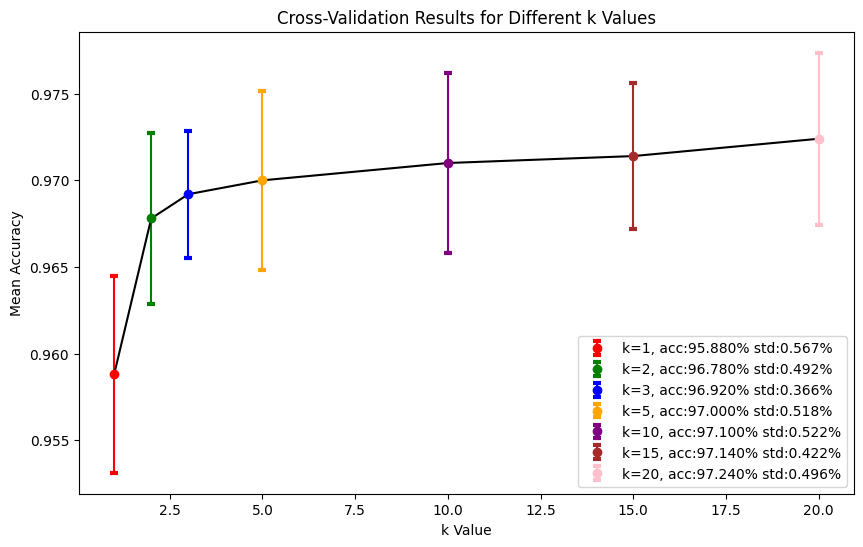

In [ ]:
# Plot k values vs accuracy graph with mean and standard deviation
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']
fig = plt.figure(figsize=(10,6))
for i in range(len(k_values_cv)):

    plt.errorbar(k_values_cv[i], accuracies_mean[i],
                       yerr=accuracies_std[i], fmt='o',
                       color=colors[i], capsize=3,capthick=3,
                       label=f'k={k_values_cv[i]}, acc:{accuracies_mean[i]*100:.3f}% std:{accuracies_std[i]*100:.3f}%')

plt.plot(k_values_cv,accuracies_mean, color='black')
plt.title('Cross-Validation Results for Different k Values')
plt.xlabel('k Value')
plt.ylabel('Mean Accuracy')
plt.legend()

Based on the provided cross-validation results:


*   k=20 has the highest mean accuracy of 97.24%.
*   k=3 has a high mean accuracy of 96.92% with a relatively low standard deviation of 0.37%.

Considering both mean accuracy and standard deviation, **k=3** seems to be a good choice as it provides a good trade-off between accuracy and stability.